# Significado das colunas do dataset

Age: age of the patient (years)

Sex: sex of the patient (M: Male, F: Female)

ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

RestingBP: resting blood pressure (mm Hg)

Cholesterol: serum cholesterol (mm/dl)

FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)

ExerciseAngina: exercise-induced angina (Y: Yes, N: No)

Oldpeak: oldpeak = ST (Numeric value measured in depression)

ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

HeartDisease: output class (1: heart disease, 0: Normal])

# Importar bibliotecas

In [936]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, RandomUnderSampler, ClusterCentroids
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Importar a base e visualizando as primeiras informações

In [937]:
#importando
base_heart = pd.read_csv('heart.csv')

In [938]:
#vendo as primeiras linhas 
base_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [939]:
#visualizando as informações das colunas
base_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [940]:
#visualizando algumas informações estatísticas
descricao = base_heart.describe()
descricao

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [941]:
#verificando a existência de linhas duplicadas
linhas_duplicadas = base_heart.duplicated().sum()
print (f'{linhas_duplicadas} linhas duplicadas')

0 linhas duplicadas


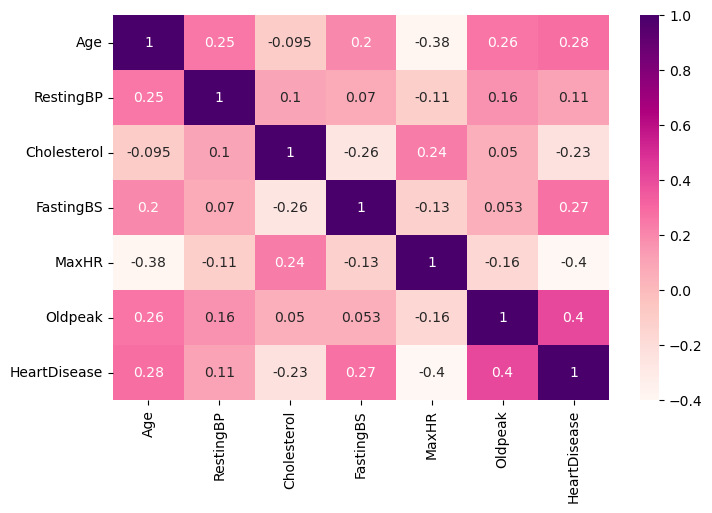

In [942]:
#correlação entre as variáveis numéricas
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(base_heart.corr(), annot = True, cmap = 'RdPu')
plt.show()

Com base nas informações que foram levantadas, é possível dizer que a base não possui campos com valores nulos e nem linhas duplicadas.
Também não existe forte correlação entre duas variáveis (caso existisse, poderia causar um viés na hora de criar o modelo).
As médias e medianas das features numéricas, no geral, estão relativamente próximas, o que indica que os dados estão distribuídos de forma próxima da normalidade.

Agora, será necessário visualizar cada feature de forma separada para identificar a necessidade de realizar algum tratamento e também para já tentarmos levantar algumas hipóteses sobre a relação das doenças cardíacas com as características apresentadas

# Análise exploratória e tratamentos

### Definição de funções

In [943]:
#função para gerar o boxplot
def boxplot(coluna):
    fig, ax = plt.subplots(figsize = (10,4))
    sns.boxplot(x = base_heart[coluna], color='#73FA9E')
    plt.show()

#histograma
def histograma(coluna):
    fig, ax = plt.subplots(figsize = (12,4))
    sns.histplot(data = base_heart, x = coluna, hue = 'HeartDisease', palette=['#AD403E','#73FA9E'])
    plt.show()

## Features numéricas

### Age              

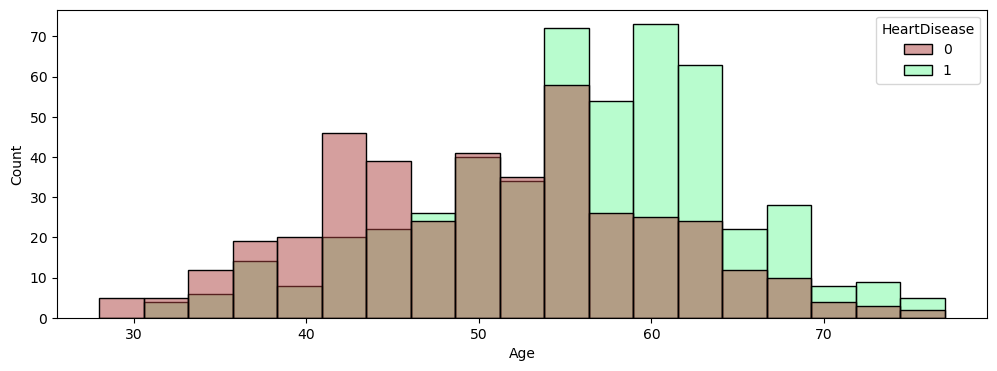

In [944]:
#histograma

histograma('Age')

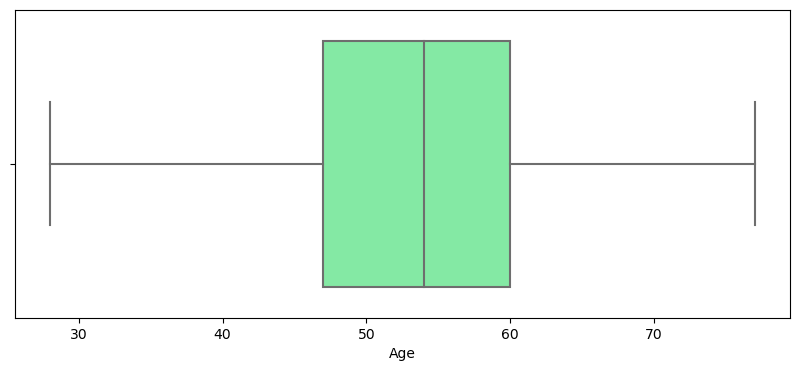

In [945]:
#boxplot

boxplot('Age')

### RestingBP

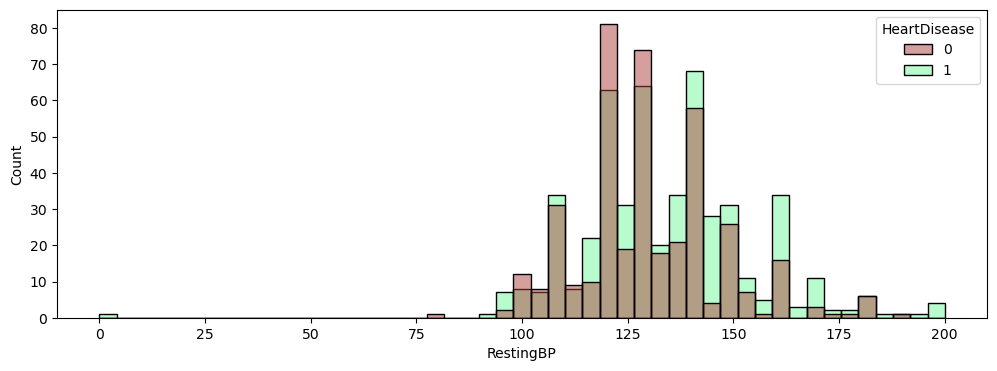

In [946]:
#histograma

histograma('RestingBP')

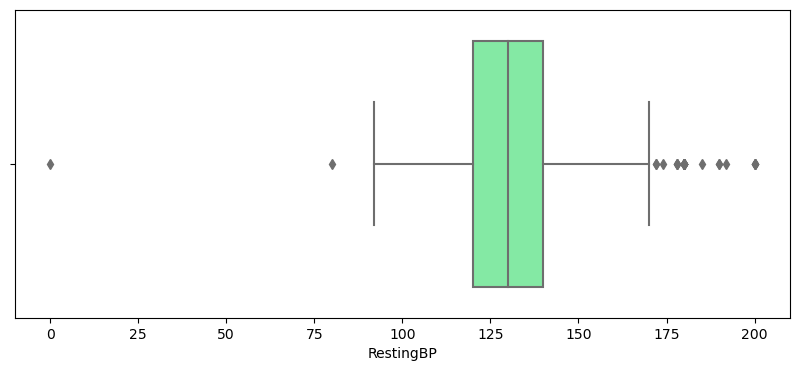

In [947]:
#boxplot

boxplot('RestingBP')

Olhando o boxplot, observa-se que algum paciente foi registrado com o valor zero para sua pressão sanguínea. Esse dado precisará de tratamento.

Vou optar por substituí-lo pela média dessa feature.

In [948]:
#vendo a linha que possui esse valor igual a zero
base_heart[base_heart.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [949]:
#substituindo o zero pela média
base_heart.loc[base_heart.RestingBP==0, 'RestingBP'] = descricao.RestingBP[1]

### Cholesterol

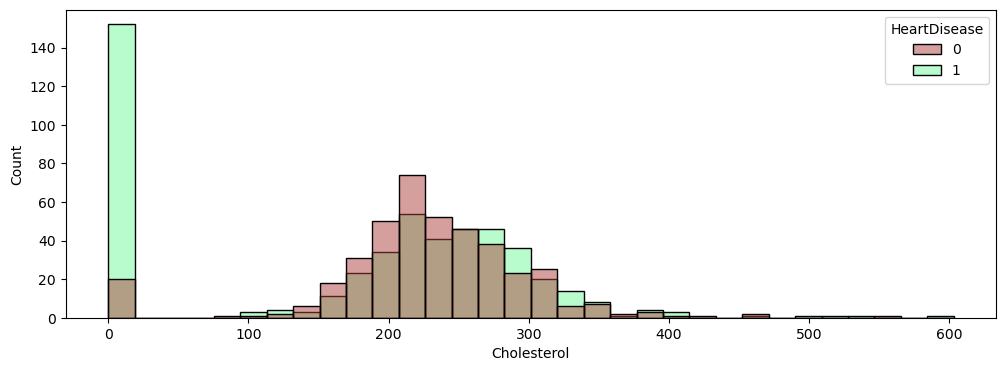

In [950]:
histograma('Cholesterol')

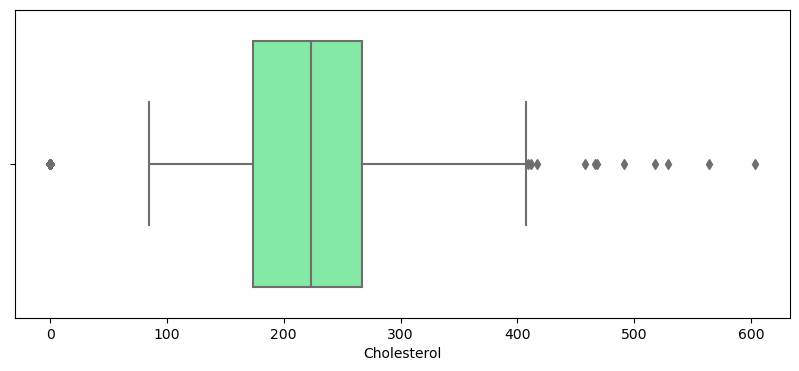

In [951]:
boxplot('Cholesterol')

Foi possível observar que a feature 'Cholesterol' também possui linhas com valores zerados. Sendo assim, optei por realizar a mesma substituição pela média dessa coluna.

In [957]:
#vendo algumas linhas que possuem o colesterol zerado

base_heart[base_heart.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115.0,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95.0,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105.0,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145.0,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110.0,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122.0,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130.0,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102.0,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130.0,0,0,LVH,122,Y,1.0,Flat,1


In [893]:
#substituindo pela média
base_heart.loc[base_heart.Cholesterol == 0, 'Cholesterol'] = descricao.Cholesterol[1]

### FastingBS

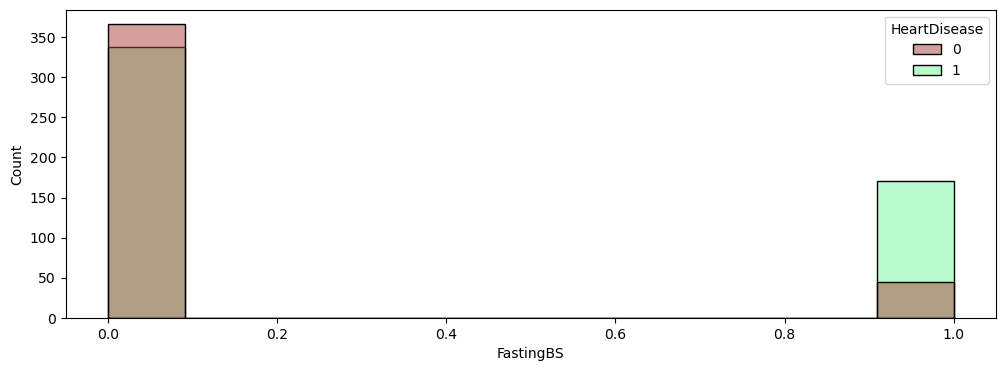

In [894]:
histograma('FastingBS')

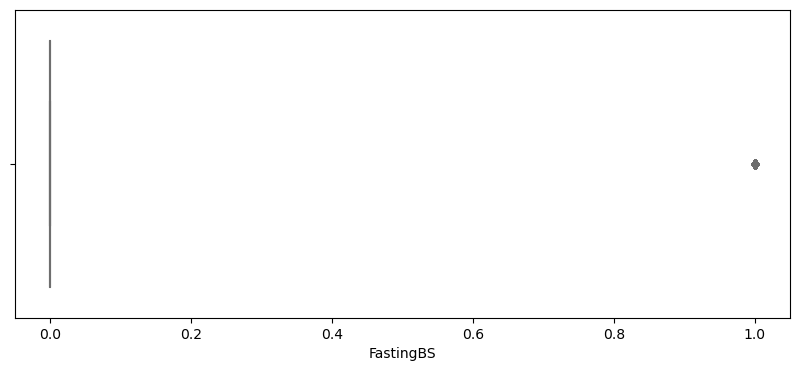

In [895]:
boxplot('FastingBS')

O boxplot ficou dessa forma pois tanto o primeiro quanto o terceiro quartil dessa feature são preenchidas pelo número zero. Sendo assim, seu limite inferior e superior são 0 (o que faz com que aquela caixa padrão não seja gerada)

### MaxHR

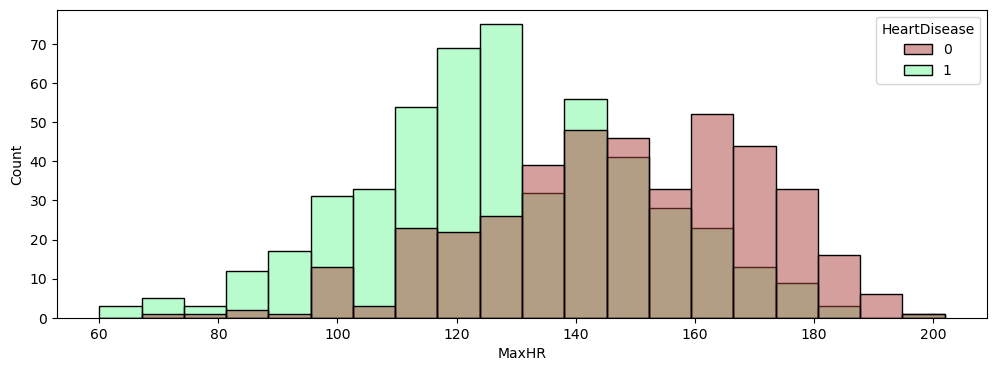

In [896]:
histograma('MaxHR')

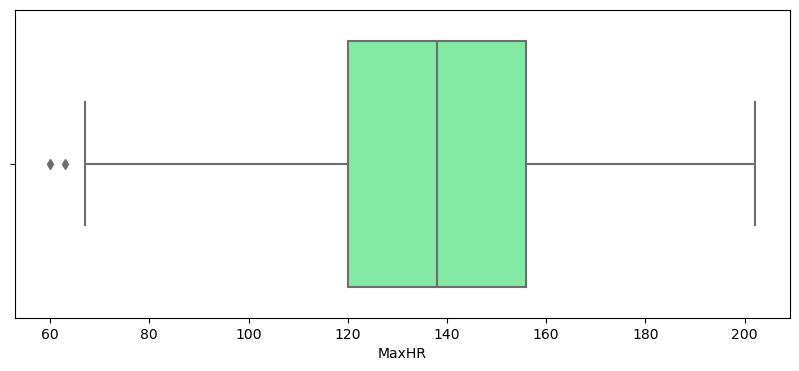

In [897]:
boxplot('MaxHR')

### Oldpeak

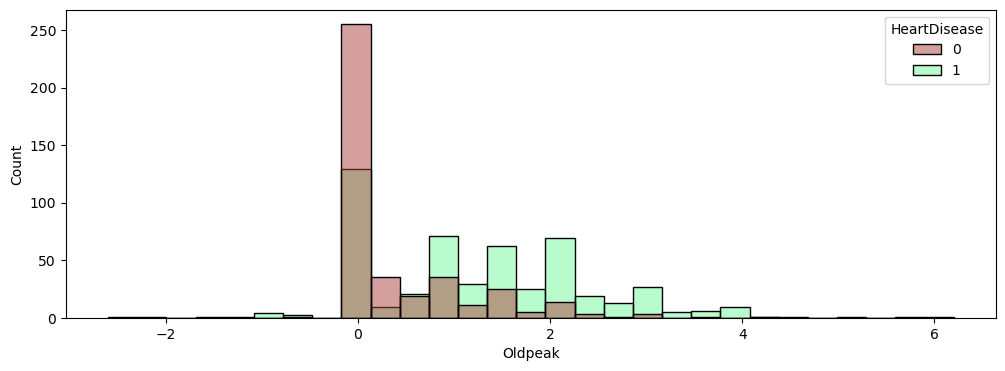

In [898]:
histograma('Oldpeak')

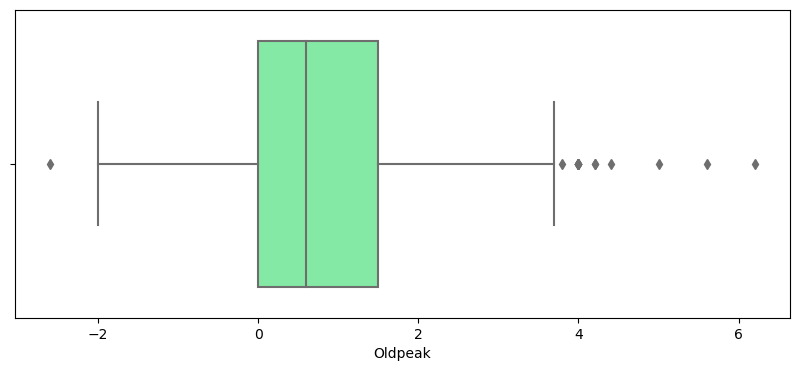

In [899]:
boxplot('Oldpeak')

## Features textuais

### Sex

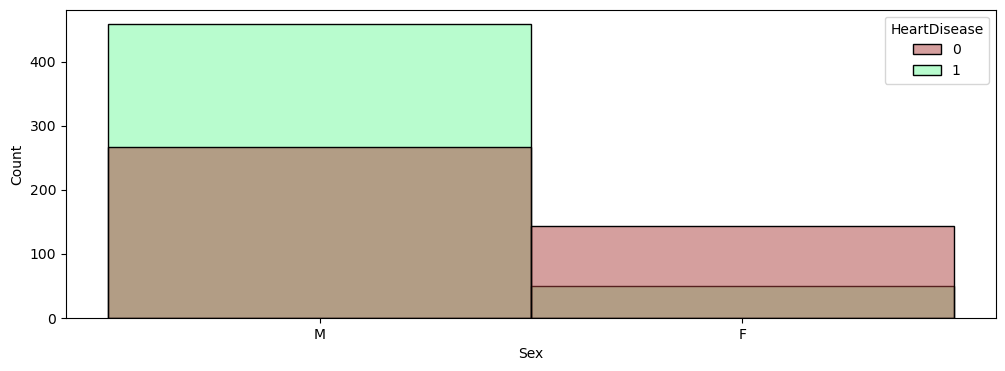

In [900]:
histograma('Sex')

### ChestPainType

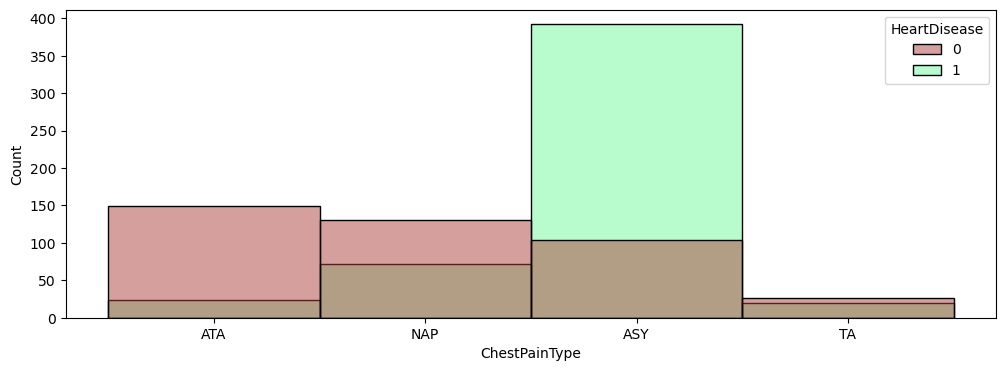

In [901]:
histograma('ChestPainType')

### RestingECG

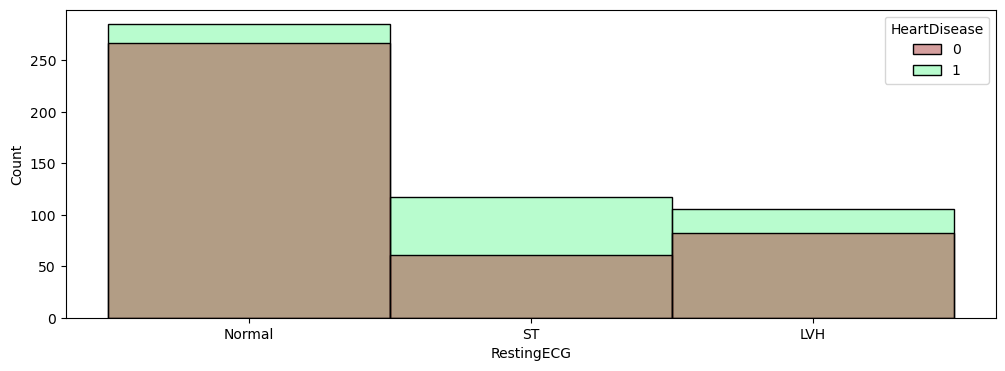

In [902]:
histograma('RestingECG')

### ExerciseAngina

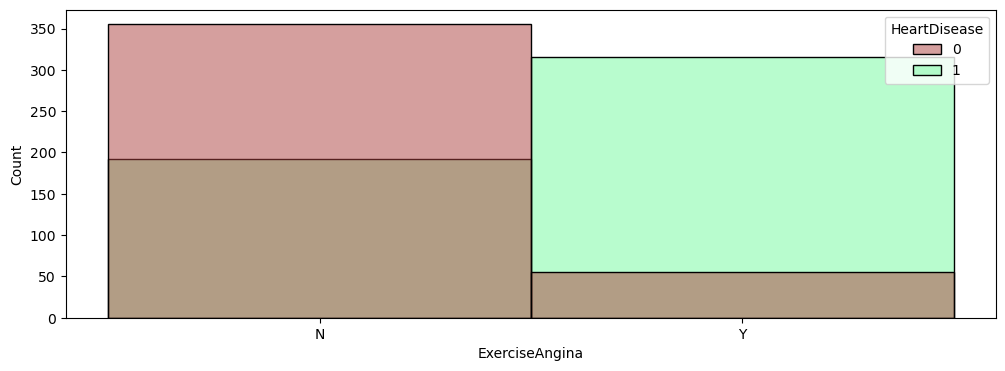

In [903]:
histograma('ExerciseAngina')

### ST_Slope

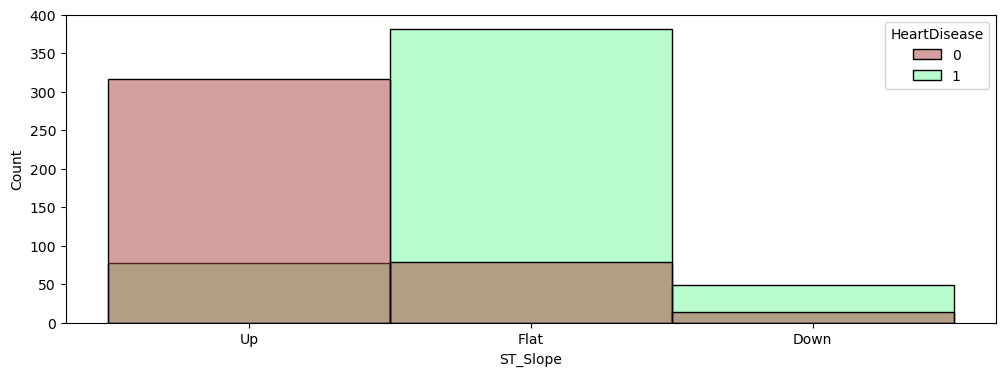

In [904]:
histograma('ST_Slope')

Para os dados apresentados, podemos levantar algumas conclusões:

- A maior proporção de pacientes analisados que possuem doença cardíaca foi encontrada em pessoas com mais de 55 anos

- Pessoas com alto nível de açúcar no sangue apresentam maior chance de possuírem doença cardíaca quando comparadas as pessoas que não possuem esse alto nível

- Os homens apresentaram maior probabilidade de ter doença do que as mulheres

- Pessoas que sentem dor angínica no peito ao fazer exercícios possuem maior tendência a terem doenças cardíacas quando comparadas as pessoas que não sentem dor

Essas são alguns insights que podem ser tirados apenas olhando os gráficos que foram apresentados anteriormente.



Nesse momento, os dados passarão pelo processo de encoding e suas escalas serão tratadas para buscar conseguir melhores resultados com a utilização dos modelos de machine learning

## Encode

In [905]:
#Sex e ExerciseAngina

base_heart.loc[base_heart.Sex == 'M', 'Sex'] = 1
base_heart.loc[base_heart.Sex == 'F', 'Sex'] = 0

base_heart.loc[base_heart.ExerciseAngina == 'Y', 'ExerciseAngina'] = 1
base_heart.loc[base_heart.ExerciseAngina == 'N', 'ExerciseAngina'] = 0

In [906]:
#ST_Slope, RestingECG e ChestPainType

base_heart = pd.get_dummies(base_heart, columns = ['ST_Slope', 'RestingECG', 'ChestPainType'])

In [907]:
#Visualizando a base
base_heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140.0,289.0,0,172,0,0.0,0,0,0,1,0,1,0,0,1,0,0
1,49,0,160.0,180.0,0,156,0,1.0,1,0,1,0,0,1,0,0,0,1,0
2,37,1,130.0,283.0,0,98,0,0.0,0,0,0,1,0,0,1,0,1,0,0
3,48,0,138.0,214.0,0,108,1,1.5,1,0,1,0,0,1,0,1,0,0,0
4,54,1,150.0,195.0,0,122,0,0.0,0,0,0,1,0,1,0,0,0,1,0


In [908]:
#melhorando as escalas
base_heart['Age'] = base_heart['Age']/base_heart.Age.max()
base_heart.RestingBP = base_heart.RestingBP/base_heart.RestingBP.max()
base_heart.Cholesterol = base_heart.Cholesterol/base_heart.Cholesterol.max()
base_heart.MaxHR = base_heart.MaxHR/base_heart.MaxHR.max()
base_heart.Oldpeak = base_heart.Oldpeak/base_heart.Oldpeak.max()

## Machine Learning

### Separar a base em treino e teste

In [909]:
X = base_heart.drop('HeartDisease', axis = 1)
y = base_heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

### Modelos

Optou-se por testar os seguintes modelos de classificação:
- ExtraTrees
- RandomForest
- LogisticRegression
- SVC

In [910]:
#criando os modelos
modelos = {'ExtraTrees': ExtraTreesClassifier(random_state=42), 'RandomForest': RandomForestClassifier(random_state=42),
          'LogisticRegression': LogisticRegression(random_state=42), 'SVC': LinearSVC(random_state=42)}

In [911]:
#realizando o treinamento, predição e avaliação
for modelo in modelos:
    modelos[modelo].fit(X_train, y_train)
    pred = modelos[modelo].predict(X_test)
    print (f'{modelo}:\nAcurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

ExtraTrees:
Acurácia: 0.8840579710144928
Recall: 0.9019607843137255
Matriz Confusão:
 [[106  17]
 [ 15 138]]

RandomForest:
Acurácia: 0.894927536231884
Recall: 0.9281045751633987
Matriz Confusão:
 [[105  18]
 [ 11 142]]

LogisticRegression:
Acurácia: 0.8876811594202898
Recall: 0.9084967320261438
Matriz Confusão:
 [[106  17]
 [ 14 139]]

SVC:
Acurácia: 0.8804347826086957
Recall: 0.9019607843137255
Matriz Confusão:
 [[105  18]
 [ 15 138]]



Todos os métodos testados apresentaram resultados satisfatórios, com o melhor método alcançando acurácia de 89,5% e recall de 92,8%.

Porém, para tentar melhorar os resultados, será testada a realização de OverSampling e UnderSampling, visto que os dados são ligeiramente desbalanceados (possuem mais resultados positivos do que negativos).

In [961]:
y_train.value_counts()

1    355
0    287
Name: HeartDisease, dtype: int64

## OverSampling

### RandomOverSampler

In [912]:
#Fazendo o resample
ROS = RandomOverSampler(random_state=42, shrinkage=0.5)
X_ros, y_ros = ROS.fit_resample(X_train, y_train)

In [913]:
#Fazendo o fit, predict e avaliando
for modelo in modelos:
    modelos[modelo].fit(X_ros, y_ros)
    pred = modelos[modelo].predict(X_test)
    print (f'{modelo}:\nAcurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

ExtraTrees:
Acurácia: 0.8876811594202898
Recall: 0.9019607843137255
Matriz Confusão:
 [[107  16]
 [ 15 138]]

RandomForest:
Acurácia: 0.9021739130434783
Recall: 0.9215686274509803
Matriz Confusão:
 [[108  15]
 [ 12 141]]

LogisticRegression:
Acurácia: 0.8876811594202898
Recall: 0.8954248366013072
Matriz Confusão:
 [[108  15]
 [ 16 137]]

SVC:
Acurácia: 0.8876811594202898
Recall: 0.9019607843137255
Matriz Confusão:
 [[107  16]
 [ 15 138]]



### SMOTE

In [914]:
#resamble
SMT = SMOTE(random_state=42)
X_smt, y_smt = SMT.fit_resample(X_train, y_train)

In [915]:
#Fazendo o fit, predict e avaliando
for modelo in modelos:
    modelos[modelo].fit(X_smt, y_smt)
    pred = modelos[modelo].predict(X_test)
    print (f'{modelo}:\nAcurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

ExtraTrees:
Acurácia: 0.8804347826086957
Recall: 0.9019607843137255
Matriz Confusão:
 [[105  18]
 [ 15 138]]

RandomForest:
Acurácia: 0.8876811594202898
Recall: 0.9019607843137255
Matriz Confusão:
 [[107  16]
 [ 15 138]]

LogisticRegression:
Acurácia: 0.8623188405797102
Recall: 0.8627450980392157
Matriz Confusão:
 [[106  17]
 [ 21 132]]

SVC:
Acurácia: 0.8695652173913043
Recall: 0.8758169934640523
Matriz Confusão:
 [[106  17]
 [ 19 134]]



### ADASYN

In [916]:
#resamble
ADS = ADASYN(random_state=42)
X_ads, y_ads = ADS.fit_resample(X_train, y_train)

In [917]:
#Fazendo o fit, predict e avaliando
for modelo in modelos:
    modelos[modelo].fit(X_ads, y_ads)
    pred = modelos[modelo].predict(X_test)
    print (f'{modelo}:\nAcurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

ExtraTrees:
Acurácia: 0.8623188405797102
Recall: 0.8627450980392157
Matriz Confusão:
 [[106  17]
 [ 21 132]]

RandomForest:
Acurácia: 0.8985507246376812
Recall: 0.9084967320261438
Matriz Confusão:
 [[109  14]
 [ 14 139]]

LogisticRegression:
Acurácia: 0.8586956521739131
Recall: 0.8366013071895425
Matriz Confusão:
 [[109  14]
 [ 25 128]]

SVC:
Acurácia: 0.8623188405797102
Recall: 0.8562091503267973
Matriz Confusão:
 [[107  16]
 [ 22 131]]



## UnderSampling

### RandomUnderSampler

In [918]:
RUS = RandomUnderSampler(random_state=42)
X_rus, y_rus = RUS.fit_resample(X_train, y_train)

In [919]:
#Fazendo o fit, predict e avaliando
for modelo in modelos:
    modelos[modelo].fit(X_rus, y_rus)
    pred = modelos[modelo].predict(X_test)
    print (f'{modelo}:\nAcurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

ExtraTrees:
Acurácia: 0.8695652173913043
Recall: 0.869281045751634
Matriz Confusão:
 [[107  16]
 [ 20 133]]

RandomForest:
Acurácia: 0.8695652173913043
Recall: 0.8758169934640523
Matriz Confusão:
 [[106  17]
 [ 19 134]]

LogisticRegression:
Acurácia: 0.8659420289855072
Recall: 0.8627450980392157
Matriz Confusão:
 [[107  16]
 [ 21 132]]

SVC:
Acurácia: 0.8731884057971014
Recall: 0.8758169934640523
Matriz Confusão:
 [[107  16]
 [ 19 134]]



### ClusterCentroids

In [920]:
CCD = ClusterCentroids(random_state=42)
X_ccd, y_ccd = CCD.fit_resample(X_train, y_train)

In [921]:
#Fazendo o fit, predict e avaliando
for modelo in modelos:
    modelos[modelo].fit(X_ccd, y_ccd)
    pred = modelos[modelo].predict(X_test)
    print (f'{modelo}:\nAcurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

ExtraTrees:
Acurácia: 0.8840579710144928
Recall: 0.9019607843137255
Matriz Confusão:
 [[106  17]
 [ 15 138]]

RandomForest:
Acurácia: 0.8876811594202898
Recall: 0.8954248366013072
Matriz Confusão:
 [[108  15]
 [ 16 137]]

LogisticRegression:
Acurácia: 0.8804347826086957
Recall: 0.8888888888888888
Matriz Confusão:
 [[107  16]
 [ 17 136]]

SVC:
Acurácia: 0.8768115942028986
Recall: 0.8888888888888888
Matriz Confusão:
 [[106  17]
 [ 17 136]]



### NearMiss

In [922]:
NMS = NearMiss()
X_nms, y_nms = NMS.fit_resample(X_train, y_train)

In [923]:
#Fazendo o fit, predict e avaliando
for modelo in modelos:
    modelos[modelo].fit(X_nms, y_nms)
    pred = modelos[modelo].predict(X_test)
    print (f'{modelo}:\nAcurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

ExtraTrees:
Acurácia: 0.8514492753623188
Recall: 0.8366013071895425
Matriz Confusão:
 [[107  16]
 [ 25 128]]

RandomForest:
Acurácia: 0.8768115942028986
Recall: 0.8954248366013072
Matriz Confusão:
 [[105  18]
 [ 16 137]]

LogisticRegression:
Acurácia: 0.8695652173913043
Recall: 0.8627450980392157
Matriz Confusão:
 [[108  15]
 [ 21 132]]

SVC:
Acurácia: 0.8623188405797102
Recall: 0.8562091503267973
Matriz Confusão:
 [[107  16]
 [ 22 131]]



Nenhum dos métodos testados de over e undersampling forneceram melhorias para o recall dos modelos de machine learning que estão sendo testados. Sendo assim, continuarei utilizando os dados de treino sem realizar nenhum resample.



## Melhorando os modelos

Dos modelos testados, o RandomForest e o LogisticRegression apresentaram resultados melhores para o recall e a acurácia. Com isso, tentarei melhorar esses 2 modelos para alcançar o maior recall possível sem comprometer muito a acurácia, visto que minha prioridade é conseguir detectar o maior número de pessoas que possuem risco de apresentar uma doença cardíaca.

### RandomForest

In [924]:
#definindo os parâmetros a serem testados
parametros = {
    'n_estimators': [50, 80, 100, 130, 150],
    'max_features': ['sqrt','log2','None'],
}


In [925]:
#criando o classificador
RF = RandomForestClassifier(random_state=42)

In [926]:
#criando um classificador que irá testar todos esses parâmetros
RF_Grid = GridSearchCV(RF, parametros, scoring='recall')

In [927]:
# Fazendo o fit dos nossos dados
RF_Grid = RF_Grid.fit(X_train, y_train)

In [928]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV 
RF_Grid.best_params_

{'max_features': 'sqrt', 'n_estimators': 130}

In [929]:
# Fazendo o predict e avaliando o modelo gerado

pred = RF_Grid.predict(X_test)
print (f'Acurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

Acurácia: 0.894927536231884
Recall: 0.9281045751633987
Matriz Confusão:
 [[105  18]
 [ 11 142]]



### LogisticRegression

In [930]:
#definindo os parâmetros a serem testados
parametros = {
    'penalty': ['l1','l2','elasticnet', 'none'],
    'C': [0.007,0.01, 0.1, 1, 10, 100],
}


In [931]:
#criando o classificador
LR = LogisticRegression(random_state=42)

In [932]:
#criando um classificador que irá testar todos esses parâmetros
LR_Grid = GridSearchCV(LR, parametros, scoring='recall')

In [933]:
# Fazendo o fit dos nossos dados
LR_Grid = LR_Grid.fit(X_train, y_train)

In [934]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV 
LR_Grid.best_params_

{'C': 0.007, 'penalty': 'l2'}

In [935]:
# Fazendo o predict e avaliando o modelo gerado

pred = LR_Grid.predict(X_test)
print (f'Acurácia: {accuracy_score(y_test, pred)}\nRecall: {recall_score(y_test,pred)}\nMatriz Confusão:\n {confusion_matrix(y_test, pred)}\n')

Acurácia: 0.8840579710144928
Recall: 0.9411764705882353
Matriz Confusão:
 [[100  23]
 [  9 144]]



Foi obtido êxito em melhorar o modelo de LogisticRegression, aumentando seu recall para 94,12% (que antes era de 90,95%).
Para isso, perdeu-se um pouco de sua acurácia, que antes era de 88,77% e agora passou para 88,41%.
Porém, essa pequena perda da acurácia é válida visto que o recall (que é a medida alvo do projeto) foi aumentado consideravelmente.


Sendo assim, o modelo de LogisticRegression, utilizando o parâmetro C igual a 0,007 e a penalty igual a l2 é o modelo escolhido para a predição.

LR = LogisticRegression(random_state=42, 'C' = 0.007, 'penalty' = 'l2')

**Recall:** 94,12%<br>
**Acurácia:** 88,41%<br>
**Matriz de confusão:**<br> 
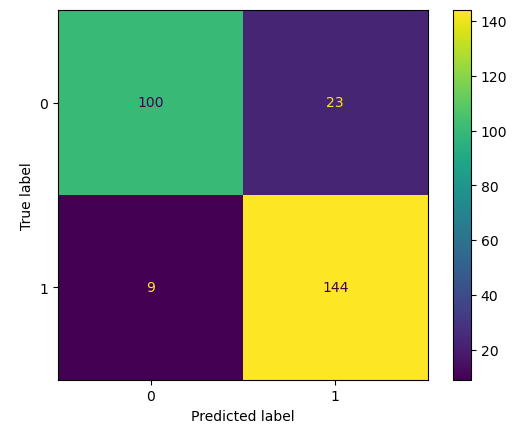